In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

import numpy as np
import pandas as pd

np.random.seed(10)

print (tf.__version__)

2.16.1


In [2]:
data = pd.read_csv('colors.csv')
print(data)

                  name  red  green  blue
0             parakeet  174    182    87
1         saddle brown   88     52     1
2       cucumber crush  222    237   215
3            pool blue  134    194   201
4             distance   98    110   130
...                ...  ...    ...   ...
14152        fire mist  251    216   197
14153  spanish leather  143    102    54
14154         aquatone  165    180   170
14155     bottle green    9     54    36
14156   tandoori spice  172    112   107

[14157 rows x 4 columns]


In [3]:
print(data.head(5))

             name  red  green  blue
0        parakeet  174    182    87
1    saddle brown   88     52     1
2  cucumber crush  222    237   215
3       pool blue  134    194   201
4        distance   98    110   130


In [4]:
len(data)

14157

In [5]:
names = data["name"]
print(names)

0               parakeet
1           saddle brown
2         cucumber crush
3              pool blue
4               distance
              ...       
14152          fire mist
14153    spanish leather
14154           aquatone
14155       bottle green
14156     tandoori spice
Name: name, Length: 14157, dtype: object


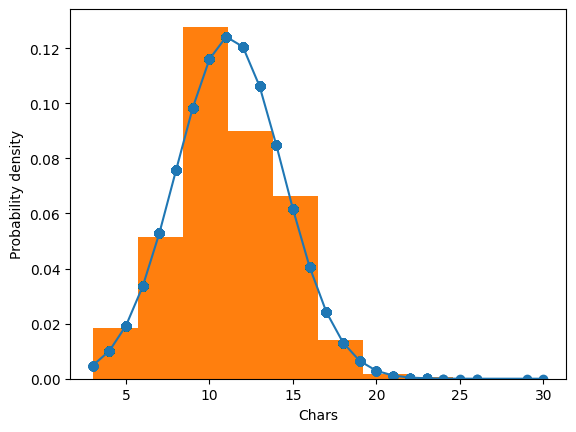

In [6]:
h = sorted(names.str.len().values)

import matplotlib.pyplot as plt
import scipy.stats as stats

fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-o')
plt.hist(h, density=True)
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [7]:
np.array(h).max()

30

In [8]:
maxlen = 25
t = Tokenizer(char_level = True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized,maxlen = maxlen)

In [9]:
from keras.utils import to_categorical
one_hot_names = to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes

28

In [10]:
print(one_hot_names)
print(one_hot_names.shape)
t.word_index

[[[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 1. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]]]
(14157, 25

{'e': 1,
 'a': 2,
 'r': 3,
 ' ': 4,
 'i': 5,
 'n': 6,
 'l': 7,
 'o': 8,
 't': 9,
 's': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'm': 17,
 'b': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'q': 25,
 'j': 26,
 'x': 27}

In [11]:
padded_names

array([[ 0,  0,  0, ...,  1,  1,  9],
       [ 0,  0,  0, ...,  8, 20,  6],
       [ 0,  0,  0, ..., 12, 10, 16],
       ...,
       [ 0,  0,  0, ...,  8,  6,  1],
       [ 0,  0,  0, ...,  1,  1,  6],
       [ 0,  0,  0, ...,  5, 11,  1]])

In [12]:
# converting rgb values from 0-255 to 0-1
def norm(value):
    return value/255
normalized_values = np.column_stack([norm(data["red"]),norm(data["green"]),norm(data["blue"])])
print(normalized_values)

[[0.68235294 0.71372549 0.34117647]
 [0.34509804 0.20392157 0.00392157]
 [0.87058824 0.92941176 0.84313725]
 ...
 [0.64705882 0.70588235 0.66666667]
 [0.03529412 0.21176471 0.14117647]
 [0.6745098  0.43921569 0.41960784]]


In [13]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, num_classes)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
model.summary()

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 25, 256)             │         291,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,859 (1.93 MB)

 Trainable params: 505,859 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
normalized_values.shape

(14157, 3)

In [15]:
one_hot_names.shape

(14157, 25, 28)

In [16]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40, 
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 41s 95ms/step - acc: 0.5833 - loss: 0.0633 - val_acc: 0.6589 - val_loss: 0.0593
Epoch 2/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - acc: 0.6643 - loss: 0.0570 - val_acc: 0.6476 - val_loss: 0.0556
Epoch 3/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - acc: 0.6621 - loss: 0.0531 - val_acc: 0.6631 - val_loss: 0.0549
Epoch 4/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 37s 92ms/step - acc: 0.6699 - loss: 0.0508 - val_acc: 0.6893 - val_loss: 0.0509
Epoch 5/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 45s 113ms/step - acc: 0.6689 - loss: 0.0479 - val_acc: 0.6928 - val_loss: 0.0491
Epoch 6/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - acc: 0.6756 - loss: 0.0450 - val_acc: 0.6942 - val_loss: 0.0482
Epoch 7/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 43s 108ms/step - acc: 0.6769 - loss: 0.0436 - val_acc: 0.6681 - val_loss: 0.0466
Epoch 8/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - acc: 0.6813 - loss: 0.0413 - val_acc: 0.6879 - val_loss: 0.0460
Epoch 9/40
399/399 ━━━━━━━━━━━━━━━━━━

In [17]:
# train with all data including the 10% that was not included before
model.fit(one_hot_names, normalized_values,
          epochs=10,
          batch_size=32)

Epoch 1/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - acc: 0.8001 - loss: 0.0118
Epoch 2/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - acc: 0.8067 - loss: 0.0090
Epoch 3/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 28s 64ms/step - acc: 0.8176 - loss: 0.0072
Epoch 4/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - acc: 0.8268 - loss: 0.0066
Epoch 5/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - acc: 0.8317 - loss: 0.0060
Epoch 6/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - acc: 0.8328 - loss: 0.0058
Epoch 7/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 32s 71ms/step - acc: 0.8299 - loss: 0.0057
Epoch 8/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - acc: 0.8399 - loss: 0.0058
Epoch 9/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - acc: 0.8342 - loss: 0.0058
Epoch 10/10
443/443 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - acc: 0.8410 - loss: 0.0055


In [18]:
model.save_weights('model_1.weights.h5')

In [19]:
model.load_weights('model_1.weights.h5')

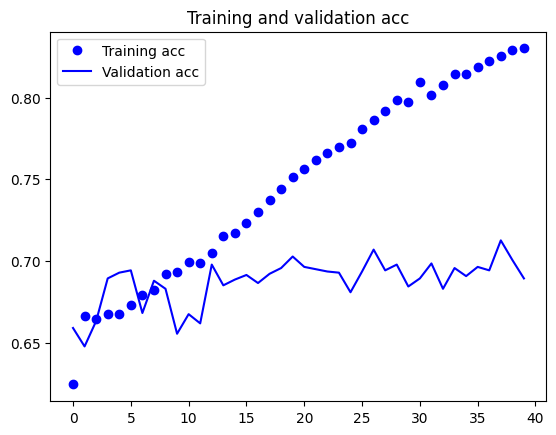

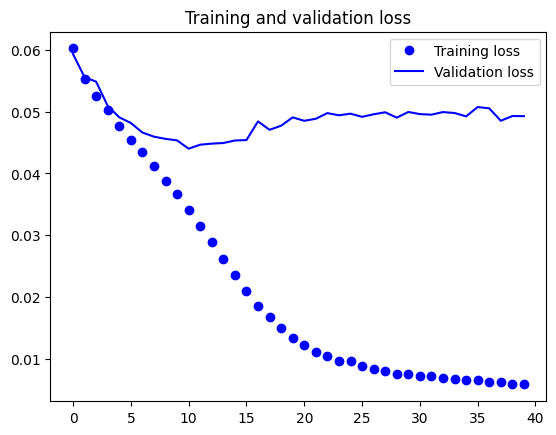

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# fn. for plot color image
def plot_rgb(rgb):
    data =[[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

# fn. for rescaling again to 0-255
def scale(n):
    return int(n*255)

# final fn. to display the color
def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    from keras.utils import to_categorical
    one_hot = to_categorical(padded, num_classes=num_classes)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step
lipstick, R,G,B: 224 31 89


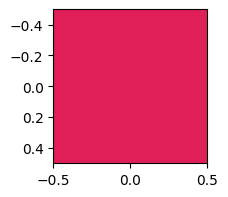

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
mauve, R,G,B: 207 151 194


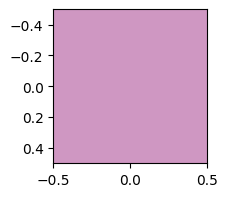

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
keras red, R,G,B: 154 100 74


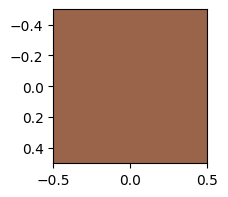

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
bull cream, R,G,B: 243 229 197


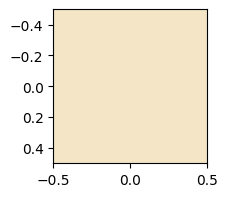

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
red, R,G,B: 216 18 21


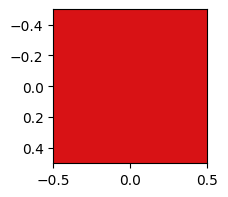

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
green, R,G,B: 17 133 38


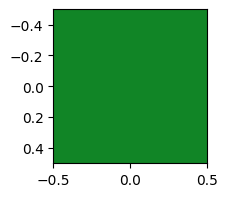

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
blue, R,G,B: 17 42 220


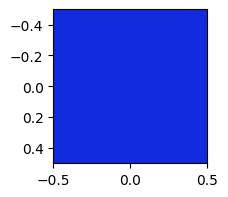

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
ochre yellow, R,G,B: 244 207 88


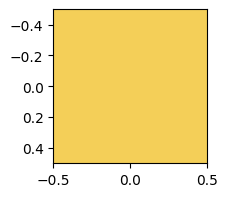

In [22]:
predict("lipstick")
predict("mauve")
predict("keras red")
predict("bull cream")
predict("red")
predict("green")
predict("blue")
predict("ochre yellow")